In [2]:
import open3d as o3d
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append('..')
from utils import get_img_simple

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
loaded_cloud = o3d.data.BunnyMesh()
mesh = o3d.io.read_triangle_mesh(loaded_cloud.path)
pcd = mesh.sample_points_poisson_disk(number_of_points=10_000, init_factor=3)
#pcd.paint_uniform_color((1, 0, 0))

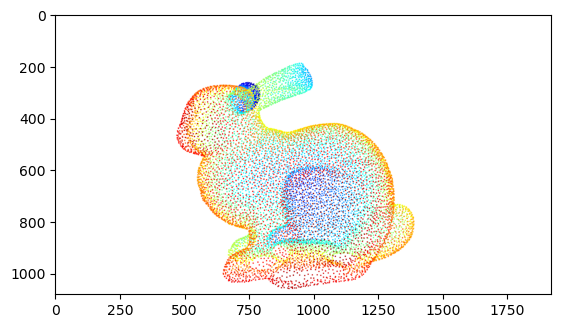

In [8]:
plt.imshow(get_img_simple([pcd]))
o3d.visualization.draw_geometries([pcd])

In [9]:
# Downsample
pcd_down =  pcd.voxel_down_sample(voxel_size=0.0001)

# Convex hull
hull, _ = pcd_down.compute_convex_hull()
hull_ls = o3d.geometry.LineSet.create_from_triangle_mesh(hull)

# Hidden point removal
diameter = np.linalg.norm(
    np.asarray(pcd_down.get_max_bound()) - np.asarray(pcd_down.get_min_bound()))

camera = [0.016839234937480775, 0.11012706483368098, 0.18720929890288865]
_, pt_map = pcd_down.hidden_point_removal(camera, diameter*200)
pcd_visible = pcd_down.select_by_index(pt_map)


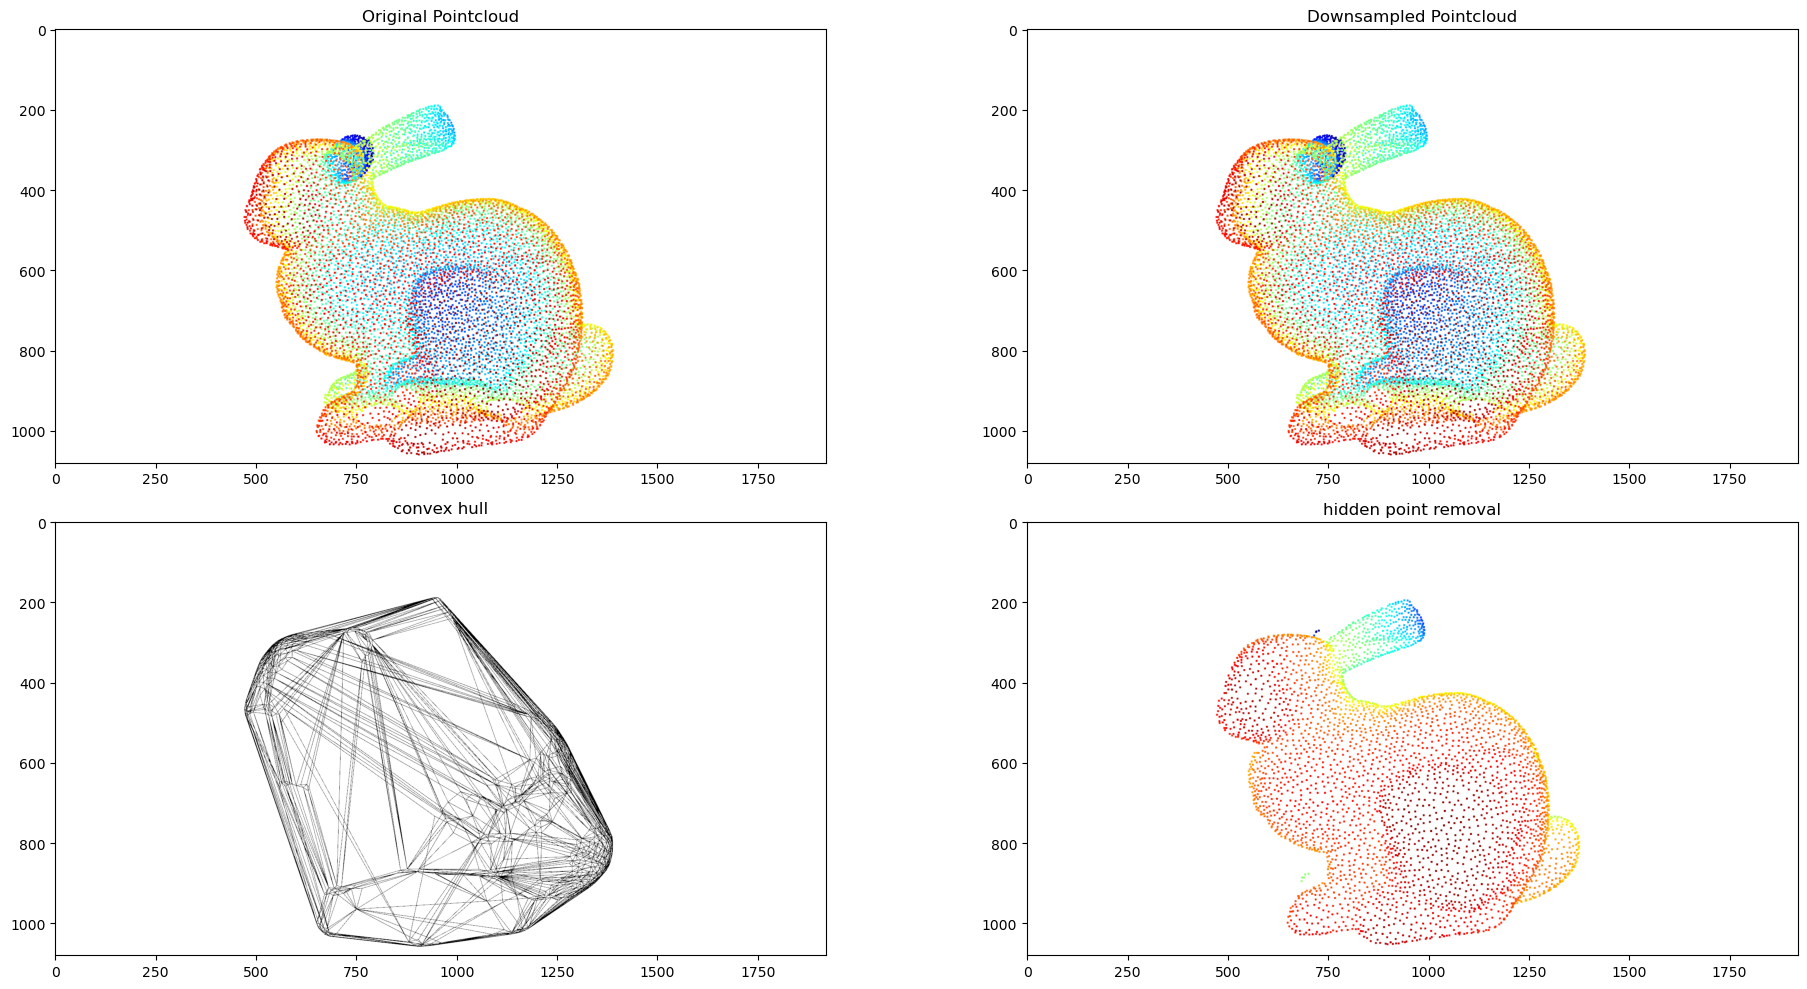

In [10]:
plt.figure(figsize=(20,10))

ax1 = plt.subplot(2, 2, 1)
ax1.imshow(get_img_simple([pcd]))
ax1.set_title('Original Pointcloud')

ax2 = plt.subplot(2, 2, 2)
ax2.imshow(get_img_simple([pcd_down]))
ax2.set_title('Downsampled Pointcloud')

ax3 = plt.subplot(2, 2, 3)
ax3.imshow(get_img_simple([hull_ls]))
ax3.set_title('convex hull')

ax4 = plt.subplot(2, 2, 4)
ax4.imshow(get_img_simple([pcd_visible]))
ax4.set_title('hidden point removal')

plt.tight_layout() 
plt.show()


In [386]:
pcd_inlier = pcd_visible
pcd_outlier = pcd_down.select_by_index(pt_map, invert=True)

pcd_inlier.paint_uniform_color((0, 1, 0))
pcd_outlier.paint_uniform_color((1, 0, 0))

o3d.visualization.draw_geometries([pcd_inlier, pcd_outlier])

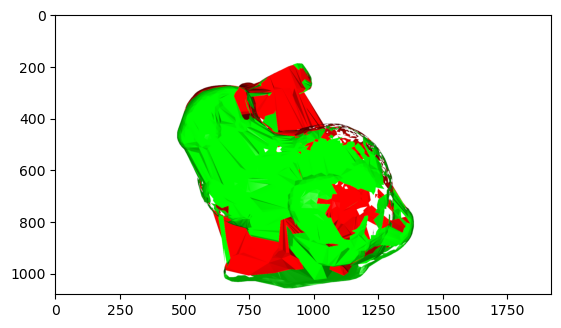

In [393]:
mesh_inlier = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(pcd_inlier, 0.02)
mesh_inlier.compute_vertex_normals()
mesh_outlier = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(pcd_outlier, 0.02)
mesh_outlier.compute_vertex_normals()
plt.imshow(get_img_simple([mesh_inlier, mesh_outlier]))
